# Linear Regression

James Ian Solima

4/5/2023

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
val_df = pd.read_csv('Math IA Data Collection - FinalData.csv')
val_df.head()

,Elo Gain,ACS,Econ,Enemy Losses,First Bloods,Plants,Defuses,Kills,Deaths,Assists
0,31,303,80,9,6,0,0,23,15,7
1,38,367,101,1,4,0,0,18,8,7
2,21,211,54,12,3,0,0,18,18,5
3,19,227,64,11,5,0,1,19,17,5
4,21,218,55,8,2,0,0,18,13,2


# Data from model, ELO Gain per Kills

In [12]:
X = val_df['Elo Gain'].values
y = val_df['Kills'].values

# Reshaping the ELO Gain Data

In [5]:
# Test Train Split needs data in this format to process
X = X.reshape(-1,1)

# Train, Test, Split Data

In [6]:
# We're splitting the data up and grabbing 100 random rows, train 80%, test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=100)

# Plot the scatter points

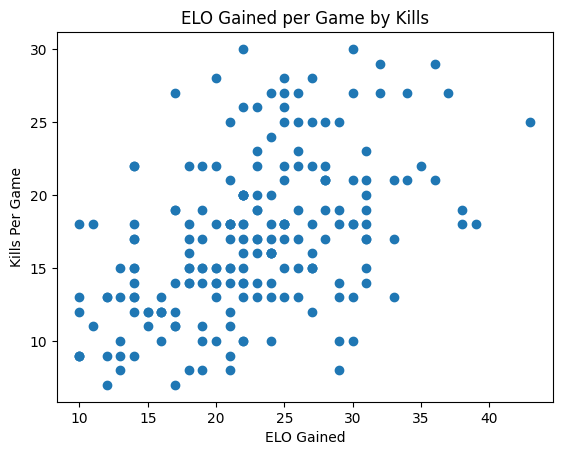

In [7]:
plt.scatter(X_train, y_train)
plt.xlabel('ELO Gained')
plt.ylabel('Kills Per Game')
plt.title('ELO Gained per Game by Kills')
plt.show()

# Regression Model Score

In [14]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_predict = lm.predict(X_test)
print(f'Train Accuracy {round(lm.score(X_train, y_train)* 100,2)}%')
print(f'Test Accuracy {round(lm.score(X_test, y_test)* 100,2)}%')

Train Accuracy 22.53%
Test Accuracy 27.5%


# Display Trained Model with Linear Regression

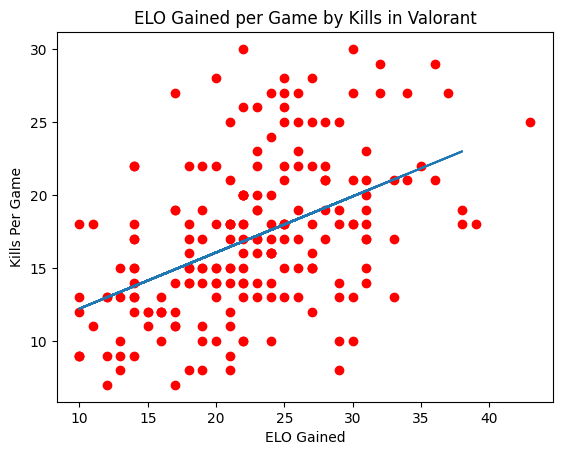

In [10]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_test, y_predict)
plt.xlabel('ELO Gained')
plt.ylabel('Kills Per Game')
plt.title('ELO Gained per Game by Kills in Valorant')
plt.show()

## Conclusion 1

The more kills you get, the more your ELO goes up sometimes

## Conclusion 2

You can get under 20 kills and still receive almost 40 ELO to rank up

## Conclusion 3

Getting kills is not the most important thing to rank up, some other variables may come into consideration such as econ rating, deaths, assists, spikes planted